In [1]:
# Imports and scripts
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pathmagic
%matplotlib inline
with pathmagic.context():
    import Preprocess as Prep
    import RelativePaths as RP
    import Evaluation as Eva
    import GatherData as Gather
    import Graphs
    import Utils

systems = ['jabref','prom','team']

[nltk_data] Downloading package stopwords to /home/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# File containing settings
path_to_yaml = '../config.yaml'
config = Utils.read_yaml_file(path_to_yaml)
files = []
dfs = [] # Order: [jabref, prom , team]
df_total = None
for system in systems:
    files.append(config['file locations'][system]['preprocess comparisons'])
    tmp_df = pd.read_csv("../" + config['file locations'][system]['preprocess comparisons'])
    tmp_df['system'] = system
    dfs.append(tmp_df)
    
jabref_bow = dfs[0].loc[dfs[0]['Feature rep.'].isin(['Bag-of-words'])]
jabref_tfidf = dfs[0].loc[dfs[0]['Feature rep.'].isin(['TF-IDF'])]

prom_bow = dfs[1].loc[dfs[1]['Feature rep.'].isin(['Bag-of-words'])]
prom_tfidf = dfs[1].loc[dfs[1]['Feature rep.'].isin(['TF-IDF'])]

team_bow = dfs[2].loc[dfs[2]['Feature rep.'].isin(['Bag-of-words'])]
team_tfidf = dfs[2].loc[dfs[2]['Feature rep.'].isin(['TF-IDF'])]


In [3]:
df_temp = [dfs[0], dfs[1], dfs[2]]
df_all = pd.concat(df_temp)
tmp_all = df_all
tmp_all=tmp_all.drop(columns=['train_size','test_size', 'settings', 'report_table'])
df_all = df_all.drop(columns=['settings','report_table', 'train_size', 'test_size'])



indices = df_all[(df_all['setting_id'] == 's1')].index
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's2')].index
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's4')].index
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's3')].index
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's5')].index
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's6')].index  
df_all.drop(indices, inplace=True)

indices = df_all[(df_all['setting_id'] == 's7')].index
df_all.drop(indices, inplace=True)

tmp_all = tmp_all.rename(columns={'macro_precision' : 'Macro precision',
                  'macro_recall' : 'Macro recall',
                  'weighted_precision' : 'Weighted precision',
                  'weighted_recall' : 'Weighted recall',
                  'macro_f1' : 'Macro f1-score',
                  'weighted_f1' : 'Macro f1-score'})

# Table, Best setting
### Average of every setting_id, over subject systems, classifiers, feature method

In [4]:
# Look at the best setting
tmp = tmp_all
tmp=tmp.groupby(['setting_id']).mean()

tmp.sort_values(by=['accuracy'], ascending=False)

,accuracy,Macro precision,Macro recall,Weighted precision,Weighted recall,Macro f1-score,Macro f1-score
setting_id,,,,,,,
s0,0.861957,0.751187,0.718078,0.867913,0.861957,0.720309,0.859884
s4,0.858232,0.745987,0.717787,0.865890,0.858232,0.717450,0.857668
s1,0.820218,0.704812,0.660823,0.824742,0.820218,0.661987,0.814003
s2,0.810505,0.702806,0.625649,0.816453,0.810505,0.634553,0.802304
s3,0.774906,0.664801,0.605113,0.777631,0.774906,0.615428,0.767555
s5,0.772442,0.678175,0.606655,0.782451,0.772442,0.614110,0.768047
s6,0.762447,0.640351,0.595307,0.769946,0.762447,0.600050,0.757459
s7,0.759357,0.666602,0.577339,0.765488,0.759357,0.587757,0.749694


# Table, Best Classifier
### Average of s0, over the subject systems with feature method Bag-of-Words

In [5]:
tmp = tmp_all

# remove tf-idf
indices = tmp[(tmp['Feature rep.'] == 'TF-IDF')].index
tmp.drop(indices, inplace=True)

indices = tmp[(tmp['setting_id'] == 's1')].index
tmp.drop(indices, inplace=True)

indices = tmp[(tmp['setting_id'] == 's2')].index
tmp.drop(indices, inplace=True)

indices = tmp[(tmp['setting_id'] == 's4')].index
tmp.drop(indices, inplace=True)

indices = tmp[(tmp['setting_id'] == 's3')].index
tmp.drop(indices, inplace=True)

indices = tmp[(tmp['setting_id'] == 's5')].index
tmp.drop(indices, inplace=True)

indices = tmp[(tmp['setting_id'] == 's6')].index  
tmp.drop(indices, inplace=True)

indices = tmp[(tmp['setting_id'] == 's7')].index
tmp.drop(indices, inplace=True)

tmp=tmp.groupby(['classifier']).mean()
tmp.sort_values(by=['accuracy'], ascending=False)

,accuracy,Macro precision,Macro recall,Weighted precision,Weighted recall,Macro f1-score,Macro f1-score
classifier,,,,,,,
MaxEnt,0.876136,0.719269,0.730494,0.882359,0.876136,0.718424,0.875479
SVM,0.871314,0.720602,0.706015,0.878717,0.871314,0.704582,0.870138
Naive-Bayes,0.852950,0.765650,0.706203,0.855723,0.852950,0.722516,0.848038


In [6]:

res = df_all.sort_values(by='accuracy',ascending=[False])

# take the mean values of every setting for each Feature representation
jab_df_frep_mean =res[res['system']=='jabref'].groupby(['Feature rep.']).mean()
prom_df_frep_mean = res[res['system']=='prom'].groupby(['Feature rep.']).mean()
team_df_frep_mean = res[res['system']=='team'].groupby(['Feature rep.']).mean()

In [7]:
jab_df_frep_mean

,accuracy,macro_precision,macro_recall,weighted_precision,weighted_recall,macro_f1,weighted_f1
Feature rep.,,,,,,,
Bag-of-words,0.903812,0.710504,0.712491,0.910964,0.903812,0.703686,0.903983
TF-IDF,0.874113,0.715655,0.678173,0.883438,0.874113,0.669738,0.874436


In [8]:
prom_df_frep_mean

,accuracy,macro_precision,macro_recall,weighted_precision,weighted_recall,macro_f1,weighted_f1
Feature rep.,,,,,,,
Bag-of-words,0.810586,0.732243,0.716838,0.817745,0.810586,0.713956,0.806534
TF-IDF,0.827647,0.807024,0.751306,0.835513,0.827647,0.756824,0.824689


In [9]:
team_df_frep_mean

,accuracy,macro_precision,macro_recall,weighted_precision,weighted_recall,macro_f1,weighted_f1
Feature rep.,,,,,,,
Bag-of-words,0.886001,0.762774,0.713383,0.888091,0.886001,0.727878,0.883138
TF-IDF,0.869585,0.778923,0.736277,0.871726,0.869585,0.749769,0.866525


In [10]:
jab_df_frep_mean.drop(labels={'macro_precision',
                  'macro_recall',
                  'weighted_precision',
                  'weighted_recall',
                  'macro_f1',
                  'weighted_f1'}, axis=1)
prom_df_frep_mean.drop(labels={'macro_precision',
                  'macro_recall',
                  'weighted_precision',
                  'weighted_recall',
                  'macro_f1',
                  'weighted_f1'}, axis=1)
team_df_frep_mean.drop(labels={'macro_precision',
                  'macro_recall',
                  'weighted_precision',
                  'weighted_recall',
                  'macro_f1',
                  'weighted_f1'}, axis=1)

j_rep = jab_df_frep_mean.rename(columns={'accuracy' : 'value'})
j_rep.reset_index(inplace=True)
j_rep['metric'] = 'accuracy'
j_rep['system'] = 'JabRef'
                      
p_rep = prom_df_frep_mean.rename(columns={'accuracy' : 'value'})
p_rep.reset_index(inplace=True)
p_rep['metric'] = 'accuracy'  
p_rep['system'] = 'ProM'
                      
m_rep = team_df_frep_mean.rename(columns={'accuracy' : 'value'})
m_rep.reset_index(inplace=True)
m_rep['metric'] = 'accuracy'
m_rep['system'] = 'TeamMates'

In [11]:
# Feature Representation barplot
df_vis_rep = pd.concat([j_rep, p_rep, m_rep], ignore_index = True)
df_vis_rep

,Feature rep.,value,macro_precision,macro_recall,weighted_precision,weighted_recall,macro_f1,weighted_f1,metric,system
0,Bag-of-words,0.903812,0.710504,0.712491,0.910964,0.903812,0.703686,0.903983,accuracy,JabRef
1,TF-IDF,0.874113,0.715655,0.678173,0.883438,0.874113,0.669738,0.874436,accuracy,JabRef
2,Bag-of-words,0.810586,0.732243,0.716838,0.817745,0.810586,0.713956,0.806534,accuracy,ProM
3,TF-IDF,0.827647,0.807024,0.751306,0.835513,0.827647,0.756824,0.824689,accuracy,ProM
4,Bag-of-words,0.886001,0.762774,0.713383,0.888091,0.886001,0.727878,0.883138,accuracy,TeamMates
5,TF-IDF,0.869585,0.778923,0.736277,0.871726,0.869585,0.749769,0.866525,accuracy,TeamMates


# BarPlot, Feature method performance, with best setting s0
### Average of accuracy over subject systems and classifiers

<Figure size 360x360 with 0 Axes>

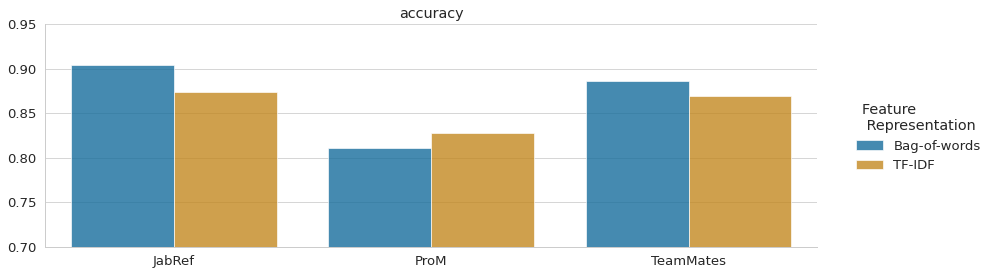

In [12]:
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis_rep,
                kind="bar",
                x="system",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="Feature rep.",
                col="metric",
                height=4.0,
                aspect=3,
                margin_titles=True)
g.set(ylim=(0.7, 0.95))
g.set_axis_labels("", "")
g.set_titles(col_template="{col_name}") #, row_template="{row_name}")
g.legend.set_title("Feature \n Representation")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
#g.fig.suptitle('Subject system: Jabref')

In [13]:
jabref_bow = jabref_bow.drop(labels={'settings'}, axis=1)
jabref_bow = jabref_bow.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

j_acc = jabref_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
j_acc['metric'] = 'accuracy'

j_prc = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
j_prc['metric'] = 'precision'

j_recall = jabref_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
j_recall['metric'] = 'recall'


j_f1 = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
j_f1['metric'] = 'f1'




Text(0.5, 0.98, 'Subject system: JabRef')

<Figure size 360x360 with 0 Axes>

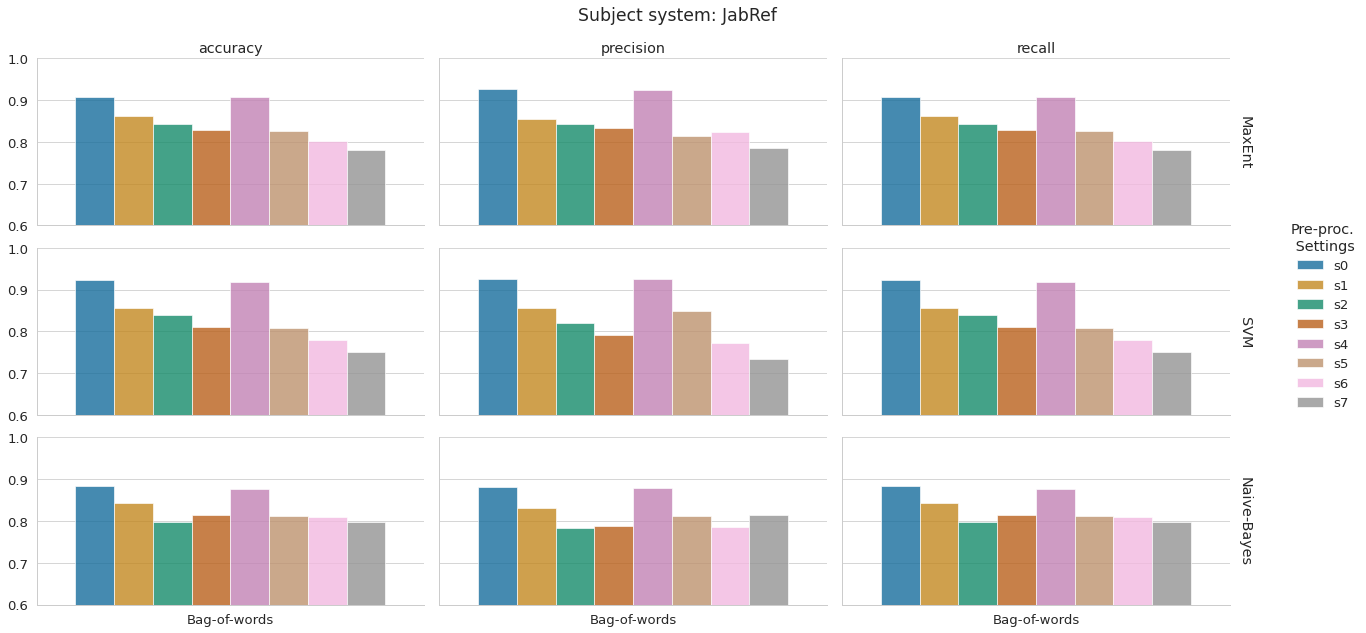

In [14]:
df_vis1 = pd.concat([j_acc,j_prc, j_recall], ignore_index = True)
df_vis2 = pd.concat([j_recall, j_f1], ignore_index = True)

sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis1,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=2,
                margin_titles=True)
g.set(ylim=(0.6, 1.00))
g.set_axis_labels("", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: JabRef')

#for p in g.fig.ax.patches:
#    _x = (p.get_x() + p.get_width())/2
#    _y = p.get_y() + p.get_height()
#    value = int(p.get_width())
#    ax.text(_x, _y, value, ha="left")

#axes = []
#for x in range(3):
#    for y in range(3):
#        axes.append(g.facet_axis(x,y))
        
#for ax in axes:
#    for p in ax.patches:
#        ax.text(p.get_x(), 
#                p.get_height() * 1.02, 
#               '{0:.1f}'.format(93.8),
#                color='black', 
#                rotation='horizontal', 
#                size='medium')


In [15]:
prom_bow = prom_bow.drop(labels={'settings'}, axis=1)
prom_bow = prom_bow.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

p_acc = prom_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
p_acc['metric'] = 'accuracy'

p_prc = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
p_prc['metric'] = 'precision'

p_recall = prom_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
p_recall['metric'] = 'recall'


p_f1 = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
p_f1['metric'] = 'f1'




Text(0.5, 0.98, 'Subject system: ProM')

<Figure size 360x360 with 0 Axes>

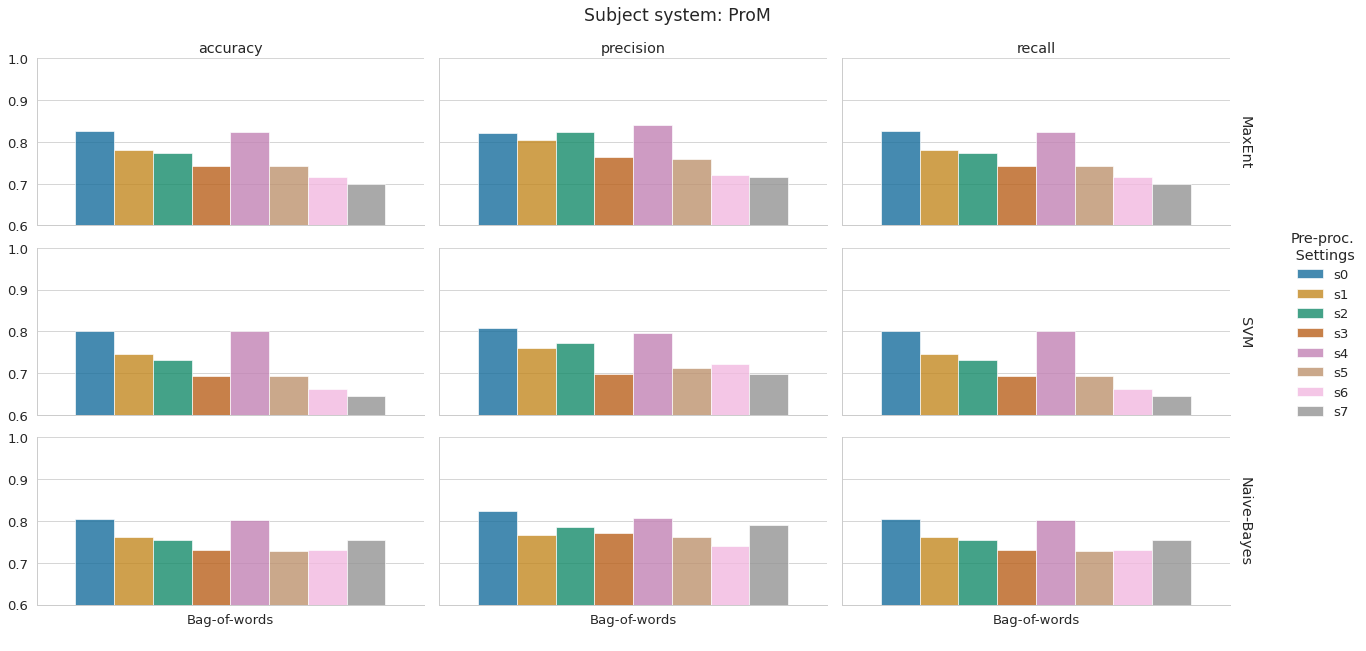

In [16]:
df_vis = pd.concat([p_acc,p_prc, p_recall], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=2,
                margin_titles=True)
g.set(ylim=(0.6, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: ProM')

In [17]:
team_bow = team_bow.drop(labels={'settings'}, axis=1)
team_bow = team_bow.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

t_acc = team_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
t_acc['metric'] = 'accuracy'

t_prc = team_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
t_prc['metric'] = 'precision'

t_recall = team_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
t_recall['metric'] = 'recall'


t_f1 = team_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
t_f1['metric'] = 'f1'



Text(0.5, 0.98, 'Subject system: TeamMates')

<Figure size 360x360 with 0 Axes>

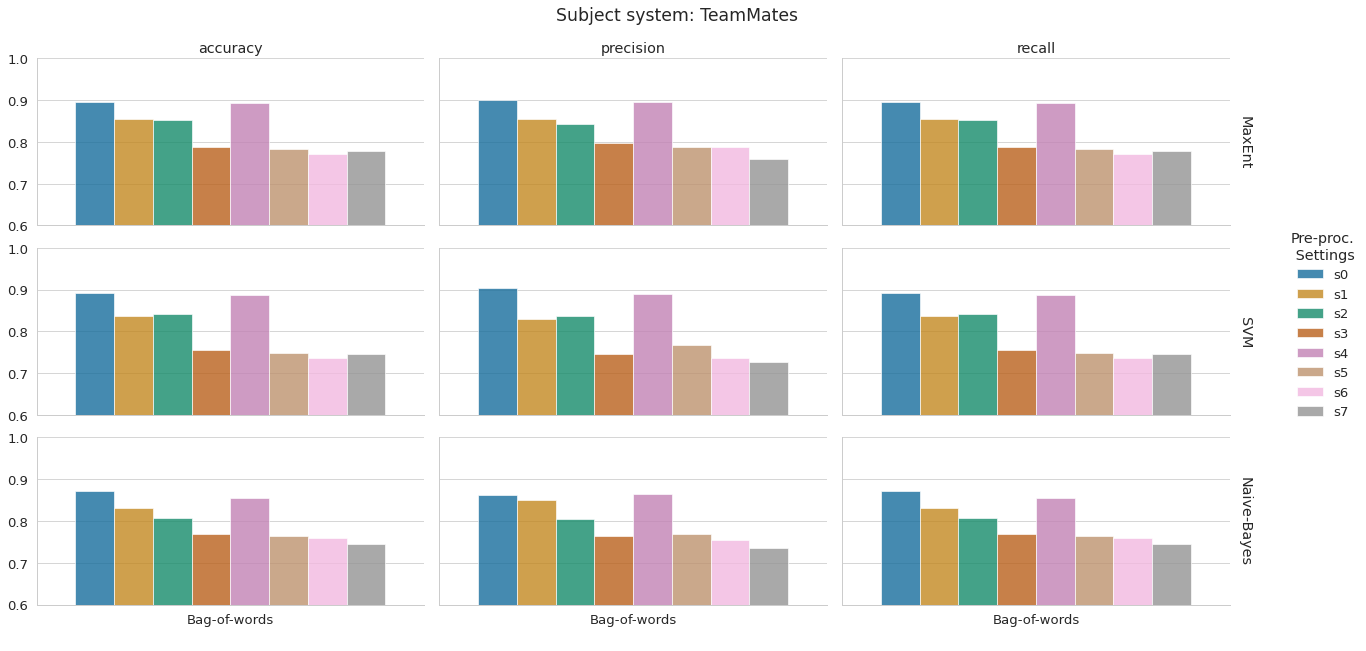

In [18]:

df_vis = pd.concat([t_acc,t_prc, t_recall], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=2,
                margin_titles=True)
g.set(ylim=(0.6, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: TeamMates')

# TF-IDF

In [19]:
jabref_bow = jabref_tfidf.drop(labels={'settings'}, axis=1)
jabref_bow = jabref_tfidf.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

j_acc = jabref_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
j_acc['metric'] = 'accuracy'

j_prc = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
j_prc['metric'] = 'precision'

j_recall = jabref_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
j_recall['metric'] = 'recall'


j_f1 = jabref_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
j_f1['metric'] = 'f1'




Text(0.5, 0.98, 'Subject system: Jabref')

<Figure size 360x360 with 0 Axes>

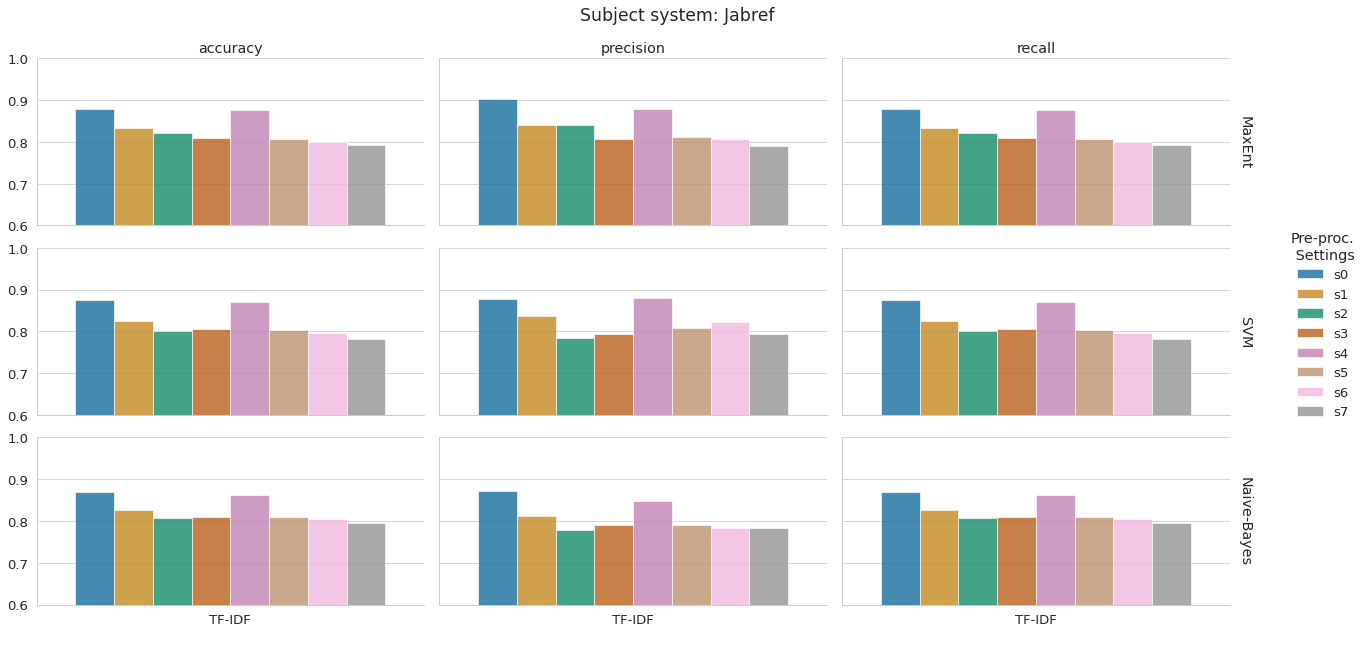

In [20]:
df_vis1 = pd.concat([j_acc,j_prc, j_recall], ignore_index = True)
df_vis2 = pd.concat([j_recall, j_f1], ignore_index = True)
sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis1,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=2,
                margin_titles=True)
g.set(ylim=(0.6, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: Jabref')

In [21]:
prom_bow = prom_tfidf.drop(labels={'settings'}, axis=1)
prom_bow = prom_tfidf.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

p_acc = prom_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
p_acc['metric'] = 'accuracy'

p_prc = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
p_prc['metric'] = 'precision'

p_recall = prom_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
p_recall['metric'] = 'recall'


p_f1 = prom_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
p_f1['metric'] = 'f1'




Text(0.5, 0.98, 'Subject system: Prom')

<Figure size 360x360 with 0 Axes>

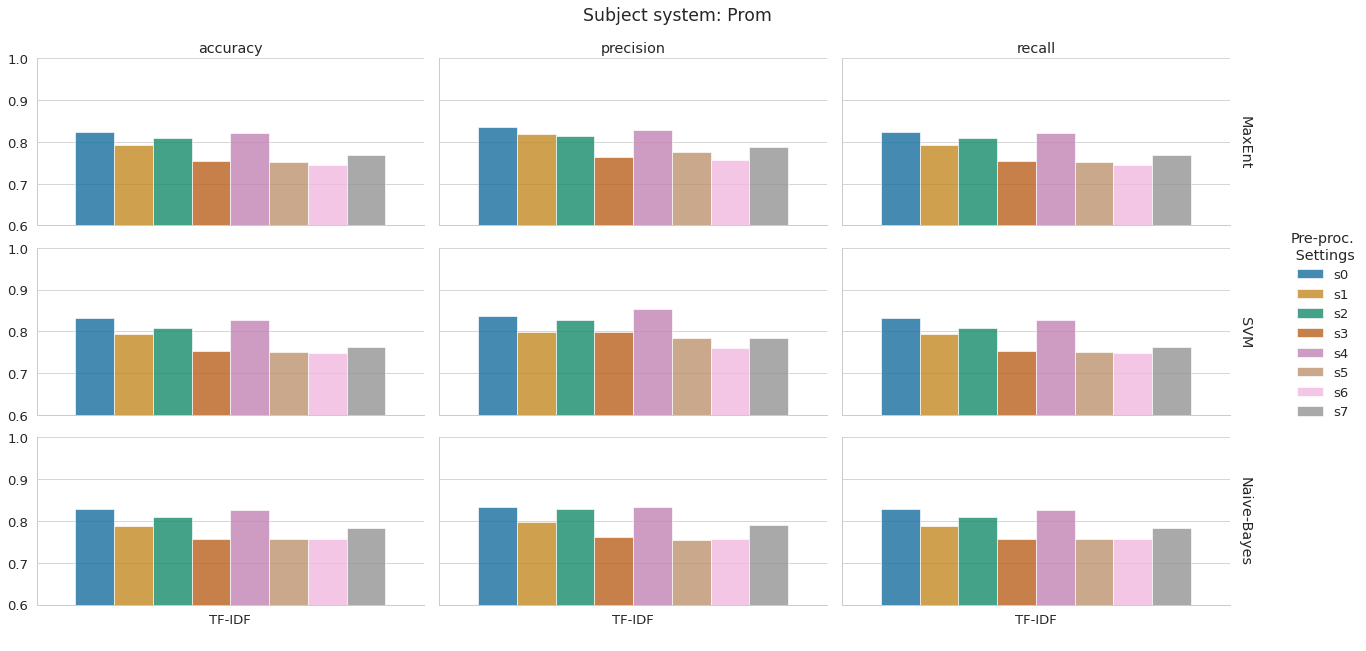

In [22]:
df_vis = pd.concat([p_acc,p_prc, p_recall], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=2,
                margin_titles=True)
g.set(ylim=(0.6, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: Prom')

In [23]:
team_bow = team_tfidf.drop(labels={'settings'}, axis=1)
team_bow = team_tfidf.rename(columns={'weighted_precision' : 'w.precision', 
                                       'weighted_recall' : 'w.recall',
                                       'weighted_f1': 'w.f1'})

t_acc = team_bow.drop(labels={'w.precision', 'w.recall', 'w.f1'}, axis=1).rename(columns={'accuracy':'value'})
t_acc['metric'] = 'accuracy'

t_prc = team_bow.drop(labels={'accuracy', 'w.recall', 'w.f1'}, axis=1).rename(columns={'w.precision':'value'})
t_prc['metric'] = 'precision'

t_recall = team_bow.drop(labels={'accuracy', 'w.f1', 'w.precision'}, axis=1).rename(columns={'w.recall':'value'})
t_recall['metric'] = 'recall'


t_f1 = team_bow.drop(labels={'accuracy', 'w.recall', 'w.precision'}, axis=1).rename(columns={'w.f1':'value'})
t_f1['metric'] = 'f1'




Text(0.5, 0.98, 'Subject system: teammates')

<Figure size 360x360 with 0 Axes>

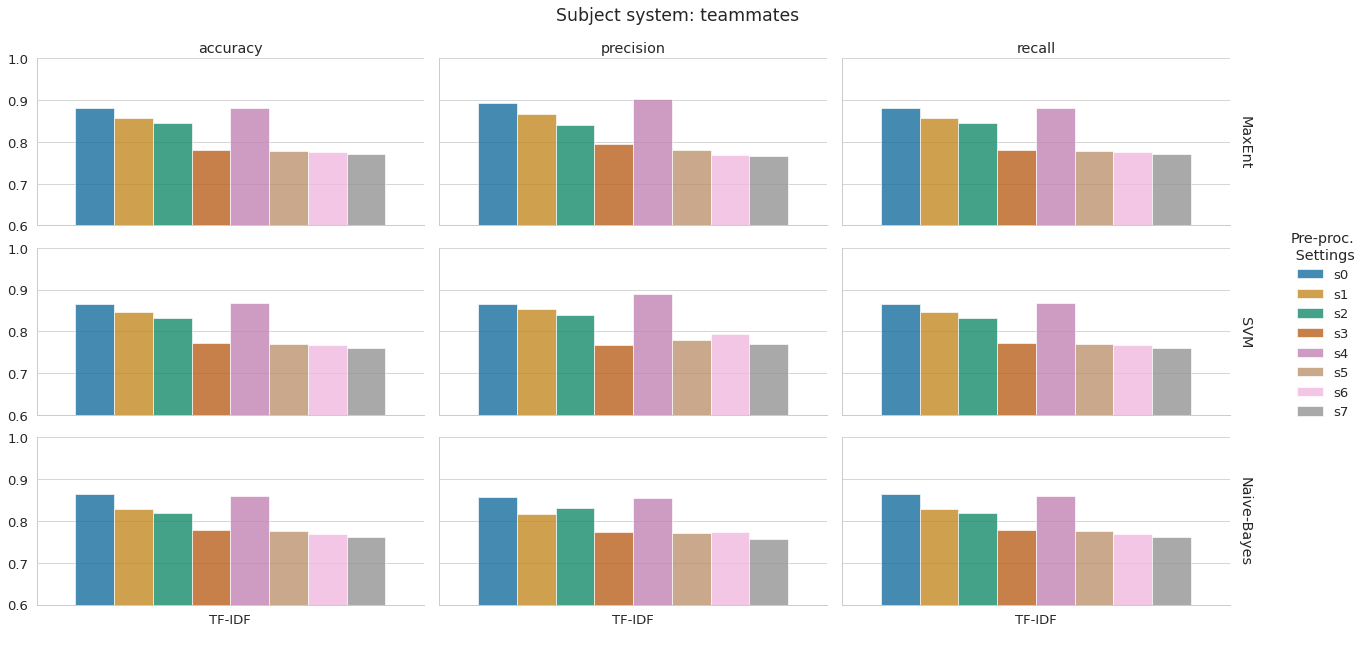

In [24]:
df_vis = pd.concat([t_acc,t_prc, t_recall,], ignore_index = True)
sns.set_theme("paper", style="whitegrid", font_scale=1.5)
sns.despine()

g =  sns.catplot(data=df_vis,
                kind="bar",
                x="Feature rep.",
                y="value",
                palette="colorblind",
                alpha=0.8,
                hue="setting_id",
                row="classifier",
                col="metric",
                height=3.0,
                aspect=2,
                margin_titles=True)
g.set(ylim=(0.6, 1.00))
g.set_axis_labels(" ", "")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.legend.set_title("Pre-proc.\n Settings")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Subject system: teammates')